# Problem 1

## (a)

Since annual interest is 900$, it becomes $15000 + 900 \times 23 = 35700$

$35700

## (b)

- N: 23
- I/Y: 6
- PV: 15000

$57,296.24

## (c)

- N: 46
- I/Y: 3
- PV: 15000

$59,015.64

## (d)

- N: 276
- I/Y: 0.5
- PV: 15000

$59,418.86

## (e)

$\lim_{n \to \infty} 15000 \times (1 + \frac{0.06}{n})^{23n} = 15000 \times e^{23*0.06}$

$59623.52

# Problem 2

Since the occurrence of event is scarce, approximation to Poisson distribution is valid

with $\lambda = 1/2$

## (a)

Exact prob = $1 - (99/100)^{50} \approx 0.395$

Approximate prob = $1 - \frac{\lambda^0 e^{-\lambda}}{0!} \approx 0.393$

## (b)

Exact prob = ${50 \choose 2} (0.01)^2 (0.99)^{48} \approx 0.076$

Approximate prob = $\frac{\lambda^2 e^{-\lambda}}{2!} \approx 0.076$

## (c)

Exact prob = $1 - 0.99^{50} - 50*0.01*0.99^{49} \approx 0.089$

Approximate prob = $0.393 - \frac{\lambda^1 e^{-\lambda}}{1!} \approx 0.090$

# Problem 3

## (a)

$f_{XY} (x,y) = f_{X|Y}(x|y) f_Y (y) = \frac{1}{2\pi v\sigma}e^{-\frac{1}{2}((\frac{y-\mu}{\sigma})^2 + (\frac{x-y}{v})^2)}$

$f_X(x) = \int f_{X|Y} (x|y) f_Y (y) dy$

From now on, we will only look at the exponent term for the sake of simplicity

$-\frac{1}{2} (\frac{\sigma^2 + v^2}{\sigma^2 v^2}) y^2 + (\frac{x}{v^2} + \frac{\mu}{\sigma^2})y - \frac{x^2}{2v^2} - \frac{\mu^2}{2\sigma^2}$

Thinking of first two term, let $\tau = \frac{\sigma^2 v^2}{\sigma^2 + v^2} (x/v^2 + \mu/\sigma^2)$

$-\frac{1}{2} (\frac{y - \tau}{\frac{\sigma v}{\sqrt{\sigma^2 + v^2}}})^2 + \frac{\tau^2}{2} (\frac{\sigma^2 + v^2}{\sigma^2 v^2}) - \frac{x^2}{2v^2} - \frac{\mu^2}{2\sigma^2}$

When integrating first term multiplied with $\frac{1}{\sqrt{2\pi}} \frac{\sqrt{\sigma^2 + v^2}}{\sigma v}$ reduces to $1$

$\frac{1}{\sqrt{2\pi}} \frac{1}{\sqrt{\sigma^2 + v^2}}$ is the non-exponent part outside.

Inside the exponent part, $-\frac{1}{2 (\sigma^2 + v^2)} x^2 + \frac{1}{\sigma^2 + v^2}\mu x - \frac{1}{2(\sigma^2 + v^2)}\mu^2 = -\frac{1}{2(\sigma^2 + v^2)} (x - \mu)^2$

$X \sim \mathcal{N} (\mu, \sqrt{\sigma^2 + v^2})$


## (b)

$E(e^{tX} | Y) = exp(yt + v^2 t^2 /2)$

$E(e^{tX}) = \int \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} (\frac{y-\mu}{\sigma})^2} \times e^{yt + v^2 t^2 /2} dy$

it's now a time to only look at the exponent term

$-\frac{1}{2\sigma^2} y ^2 + (\mu/\sigma^2 + t) y - \frac{\mu^2}{2\sigma^2} + \frac{v^2 t^2}{2}$

$-\frac{1}{2\sigma^2} (y - (\mu + \sigma^2 t))^2 + \mu t + (\sigma^2 + v^2)t^2/2$

So entire mgf boils down to $X \sim \mathcal{N} (\mu, \sqrt{\sigma^2 + v^2})$



# Problem 4

## (a)

Let $W = \sum_{i=1}^{10} W_i$

From i.i.d. condition, we know that $E[W] = 0, Var[W] = 10$

Using Cantelli's ineq (one-sided version of Chebyshev ineq),

$Pr(W > 5) \leq \frac{10}{10 + 25} = 0.285$

## (b)

Note that sum of i.i.d. normal distribution follows $\mathcal{N}(\sum \mu_i, \sum \sigma_i^2)$

$Pr(\sum_{i=1}^{10} W_i > 5) = Pr(Z > 5/\sqrt{10}) = 1 - \Phi(5/\sqrt{10})$ where $Z$ is standard normal distribution

## (c)

Approximately $0.0553$ for normal i.i.d.s

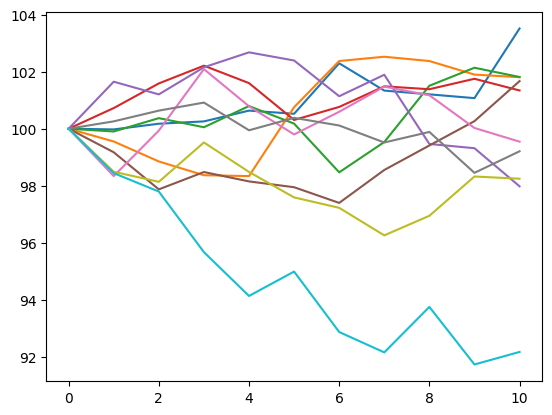

0.0553


In [5]:
from matplotlib import pyplot as plt
import numpy as np

exceeded = 0
total_num = 10000
for i in range(total_num):
    price_updowns = np.zeros(11)
    price_updowns[0] = 100
    price_updowns[1:] = np.random.standard_normal(10)
    price_trajectory = np.cumsum(price_updowns)
    if i % 1000 == 0:
        plt.plot(price_trajectory)
    if price_trajectory[-1] > 105:
        exceeded += 1
plt.show()
print(exceeded/total_num)


In [ ]:
from math import sqrt
import timeit

def f(lam):
    return -1 + lam + lam**2

def deriv(lam):
    return 1 + 2*lam

true_lambda = (-1 + sqrt(5))/2


def naive_method(l_0 = 1):
    l = l_0
    while True:
        l -= f(l)/deriv(l)
        if abs(l - true_lambda) < 1e-6:
            return l


def bisect_method():
    lo = 0
    hi = 1
    while True:
        mid = (lo + hi)/2
        if f(mid) < 0:
            lo = mid
        else:
            hi = mid
        if abs(mid - true_lambda) < 1e-6:
            return mid

print(f'naive Newton\'s method took {timeit.timeit(lambda: naive_method(), number = 1000000)}')

print(f'bisect method took {timeit.timeit(lambda: bisect_method(), number = 1000000)}')

naive Newton's method took 7.984524973000134
bisect method took 19.87810302899993


# Problem 6

Since any point can form a semi circle, pick any. Circumference is now divided into two segments. It's either all one or the other for $n-1$ points, making the probability $(1/2)^{n-1}$. We can pick any points from $n$ points and all are disjoint so $n \times (1/2)^{n-1}$ 